<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Цель:** Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.
     
   Работа пройдёт в несколько этапов:
 1. Загрузка и подготовка данных.
 2. Умножение матриц.
 3. Алгоритм преобразования.
 4. Проверка алгоритма.

**Описание данных:**

+ Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
+ Целевой признак: количество страховых выплат клиенту за последние 5 лет.

In [116]:
# подключаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# округляем значения до пяти знаков после запятой
pd.options.display.float_format = '{:.5f}'.format

## Загрузка данных

In [117]:
# загрузим датасет
if os.path.exists('10.1. insurance.csv'):
    df = pd.read_csv('10.1. insurance.csv')
elif os.path.exists('/datasets/insurance.csv'):
    df = pd.read_csv('/datasets/insurance.csv')
else:
    print('Nothing works.')
df.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.00000,49600.00000,1,0
1,0,46.00000,38000.00000,1,1
2,0,29.00000,21000.00000,0,0
3,0,21.00000,41700.00000,2,0
4,1,28.00000,26100.00000,0,0
5,1,43.00000,41000.00000,2,1
6,1,39.00000,39700.00000,2,0
7,1,25.00000,38600.00000,4,0
8,1,36.00000,49700.00000,1,0
9,1,32.00000,51700.00000,1,0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [119]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000
mean,0.49900,30.95280,39916.36000,1.19420,0.14800
std,0.50005,8.44081,9900.08357,1.09139,0.46318
min,0.00000,18.00000,5300.00000,0.00000,0.00000
25%,0.00000,24.00000,33300.00000,0.00000,0.00000
50%,0.00000,30.00000,40200.00000,1.00000,0.00000
75%,1.00000,37.00000,46600.00000,2.00000,0.00000
max,1.00000,65.00000,79000.00000,6.00000,5.00000


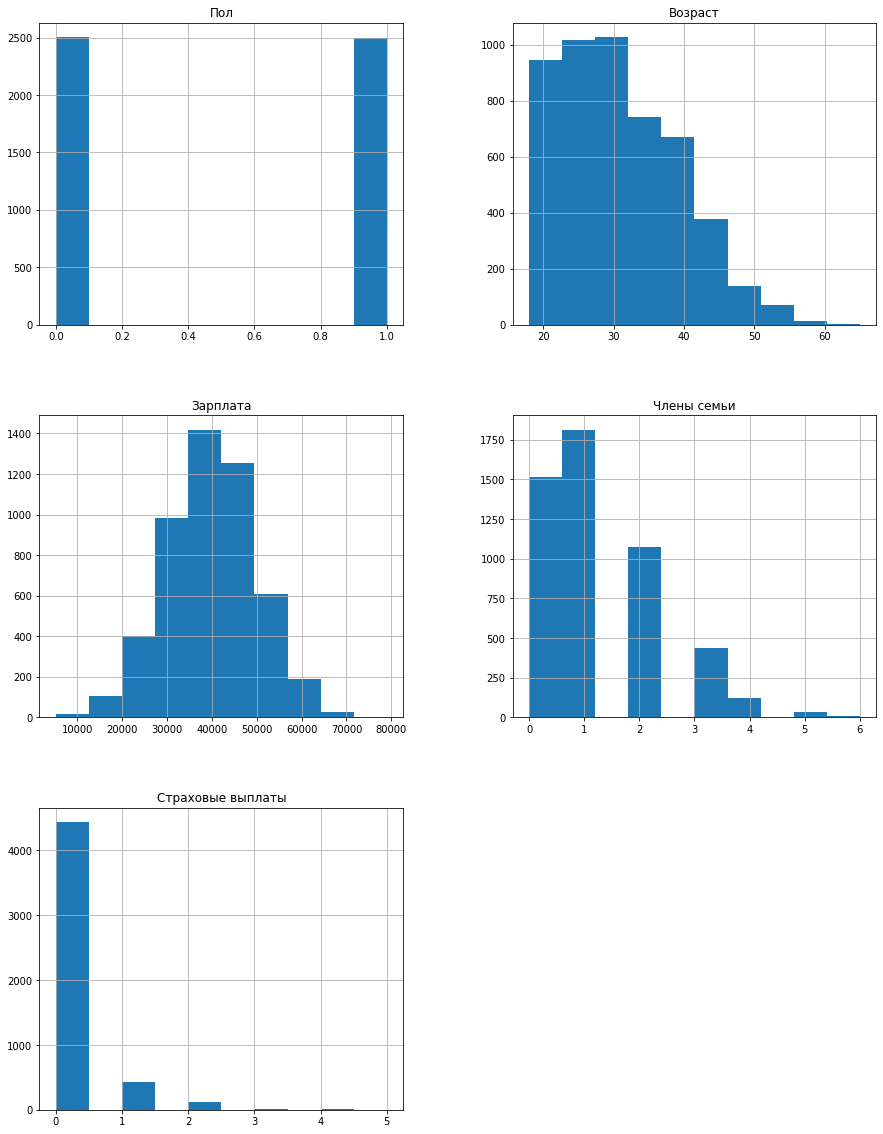

In [120]:
# строим гистограммы для всего датафрейма
df.hist(figsize=(15, 20))
plt.show()

In [121]:
# проверим дубликаты
df.duplicated().sum()

153

**Так как у нас нет id клиента и у нас мало столбцов и они достаточно общие, поэтому вполне возможно, что это не дубликаты, а просто совпадающие данные. Хотя, судя по всему, в данной задаче не требуется предобработка данных, но тем не менее мы изменим тип данных в столбцах "Возраст" и "Зарплата", изменим названия столбцов.**

In [123]:
df['Возраст'] = df['Возраст'].astype(int)
df['Зарплата'] = df['Зарплата'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int64
 1   Возраст            5000 non-null   int64
 2   Зарплата           5000 non-null   int64
 3   Члены семьи        5000 non-null   int64
 4   Страховые выплаты  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


In [124]:
df = df.rename(columns={'Пол': 'gender',
                        'Возраст': 'age',
                        'Зарплата': 'salary',
                        'Члены семьи': 'family_members',
                        'Страховые выплаты': 'insurance_payments'})

In [125]:
df.head()

,gender,age,salary,family_members,insurance_payments
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0


**Вывод:**     
+ удалили дубликаты   
+ переименовали столбцы   
+ изменили тип данных   
+ присутствуют незначительные выбросы    
+ пропуски отсутствуют

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** качество линейной регрессии не измениться

**Обоснование:** ...

Умножим признаки на обратимую матрицу P и подставим новую матрицу в формулы.    
Тогда:

Предсказания:

$$
a = XPw
$$

Задача обучения:

$$
w = \arg\min_w MSE(XPw, y)
$$

Формула обучения:

$$
w = ((XP)^T XP)^{-1} (XP)^T y
$$

Свойства обратимой матрицы:

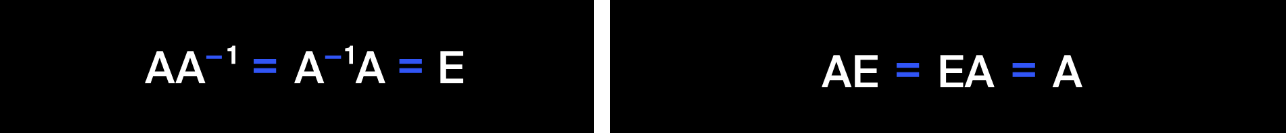

а также

Преобразуем формулу предсказания, используя свойства обратимой матрицы:

<div class="alert alert-info">  
    
$$a = X P ((XP)^T XP)^{-1} (XP)^T y =$$   
$$ = X P (P^T X^T XP)^{-1} P^T X^T y  =$$   
$$ = X P (X^T XP)^{-1}(P^T)^{-1} P^T X^T y =$$   
$$ = X P P^{-1} (X^T X)^{-1} E X^T y =$$   
$$ = X E (X^T X)^{-1} X^T y$$ 
    
</div>

Тогда, учитывая формулу обучения:

$$
w = (X^T X)^{-1} X^T y
$$    
получаем   
$$
a = Xw
$$

**Вывод:**     
Качество линейной регрессии не измениться при умножении на обратимую матрицу. Параметры линейной регрессии в исходной задаче и в преобразованной связаны свойствами обратной матрицы.

## Алгоритм преобразования

<div class="alert alert-info">
Мы умножим матрицу признаков на обратимую квадратную матрицу с размерностью, соответствующей количеству столбцов признаков.
</div>

**Обоснование**

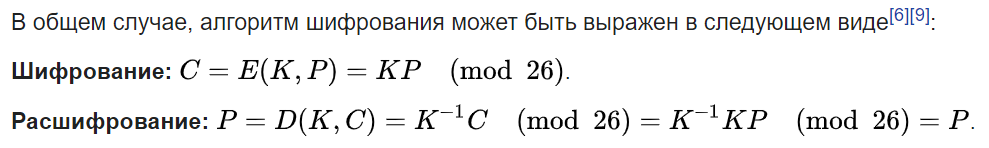

<div class="alert alert-info">
    
+ разобьём данные на признаки и целевой признак    
+ создадим рандомную квадратную матрицу    
+ проверим её обратимость    
+ умножим признаки на матрицу   
+ затем умножим полученные данные на обратную матрицу    
+ проверим совпадают ли полученные данные с исходными
    
</div>

In [126]:
# разобьём данные на признаки и целевой признак
X = df.drop(['insurance_payments'], axis=1)
y = df['insurance_payments']

In [127]:
X.shape, y.shape

((5000, 4), (5000,))

In [128]:
# создадим рандомную квадратную матрицу
np.random.seed(123)
RM = np.random.randint(20, size=(X.shape[1], X.shape[1]))
RM

array([[13,  2,  2,  6],
       [17, 19, 10,  1],
       [ 0, 17, 15,  9],
       [ 0, 14,  0, 15]])

In [129]:
# проверим существует ли обратная иатрица
RM_inv = np.linalg.inv(RM)
RM_inv

array([[ 0.05117   ,  0.01969353, -0.01995169, -0.00980989],
       [-0.07053161,  0.05393594, -0.02655308,  0.04054876],
       [ 0.04043813, -0.03092327,  0.08189043, -0.06324796],
       [ 0.06582951, -0.05034021,  0.02478287,  0.02882115]])

In [130]:
# посмотрим на исходных данных
X.head()

,gender,age,salary,family_members
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


In [131]:
# закодируем данные умножив на рандомную матрицу
X_RM = X @ RM
X_RM.head()

,0,1,2,3
0,710,843995,744412,446462
1,782,646888,570460,342061
2,493,357551,315290,189029
3,357,709327,625710,375351
4,489,444234,391782,234934


In [132]:
# раскодируем данные умножив на обратную матрицу
df_new = X_RM @ RM_inv
df_new.head()

,0,1,2,3
0,1.00000,41.00000,49600.00000,1.00000
1,0.00000,46.00000,38000.00000,1.00000
2,-0.00000,29.00000,21000.00000,0.00000
3,0.00000,21.00000,41700.00000,2.00000
4,1.00000,28.00000,26100.00000,0.00000


In [133]:
df_new.columns = X.columns

In [134]:
df_new

,gender,age,salary,family_members
0,1.00000,41.00000,49600.00000,1.00000
1,0.00000,46.00000,38000.00000,1.00000
2,-0.00000,29.00000,21000.00000,0.00000
3,0.00000,21.00000,41700.00000,2.00000
4,1.00000,28.00000,26100.00000,0.00000
...,...,...,...,...
4995,0.00000,28.00000,35700.00000,2.00000
4996,0.00000,34.00000,52400.00000,1.00000
4997,0.00000,20.00000,33900.00000,2.00000
4998,1.00000,22.00000,32700.00000,3.00000


In [136]:
df_new = df_new.round().astype(int)
(df_new == X).mean()

gender           1.00000
age              1.00000
salary           1.00000
family_members   1.00000
dtype: float64

In [137]:
df_new.head()

,gender,age,salary,family_members
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


**Вывод:**   
Как мы видим, данные стали прежними. Качество линейной регрессии не поменяется. Мы умножаем признаки m x n на матрицу n x n и получаем матрицу такого же размера m x  n, но с равномерно изменёнными значениями. И получаем истинную умножив изменённую матрицу на обратную квадратной.

## Проверка алгоритма

In [138]:
# разобьём на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [139]:
# проверим длины наших выборок
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3750, 4), (3750,), (1250, 4), (1250,))

In [140]:
# создадим класс LinearRegression
class LinearRegression:
    def fit(self, train_X, train_y):
        X = np.concatenate((np.ones((train_X.shape[0], 1)), train_X), axis=1)
        y = train_y
        w = np.linalg.inv(X.T @ X) @ X.T @ y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_X):
        return test_X @ self.w + self.w0

**Посчитаем метрику R2 на исходных данных**

In [141]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2_score(y_test, predictions)

0.4301846988606346

**Посчитаем метрику R2 на данных, умноженных на матрицу**

In [142]:
# умножим признаки на матрицу
X_train_RM, X_test_RM = X_train @ RM, X_test @ RM

In [143]:
model2 = LinearRegression()
model2.fit(X_train_RM, y_train)
predictions2 = model2.predict(X_test_RM)
r2_score(y_test, predictions2)

0.4301847118405643

**Вывод:**    
Рассчитав метрику R2 на исходных данных и на данных, умноженных на матрицу, мы подтвердили работу алгоритма. Качество линейной регрессии не измениться при умножении на обратимую матрицу.

## Общий вывод

+ загрузили и подготовили данные   
+ теоретически доказали, что качество линейной регрессии не измениться при умножении на обратимую матрицу    
+ применили алгоритм преобразования к датафрейму     
+ проверили алгоритм на данных, посчитав метрику R2 на исходных данных и на данных, умноженных на матрицу   

**Разработали метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Данные восстанавливаются при умножении на ключ (обратную матрицу). Качество линейной регрессии не меняется при умножении на обратимую матрицу.**